## Logistic Regression (with Titanic data set)

Based on https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

### Step 1 - reading in data sets

In [3]:
train_ds = pd.read_csv('data/titanic_train.csv')
test_ds = pd.read_csv('data/titanic_test.csv')

In [4]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2 - get general understanding about the data sets

In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
len(train_ds),len(test_ds)

(891, 418)

In [7]:
# Get information about unique values in numeric columns
train_ds_numerics_only = train_ds.select_dtypes(include=np.number)

for column in train_ds_numerics_only.columns:
    print(f'Column={column}, unique values={train_ds_numerics_only[column].nunique()}')   

Column=PassengerId, unique values=891
Column=Survived, unique values=2
Column=Pclass, unique values=3
Column=Age, unique values=88
Column=SibSp, unique values=7
Column=Parch, unique values=7
Column=Fare, unique values=248


In [8]:
numeric_columns = train_ds_numerics_only.columns.drop('PassengerId')
numeric_columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

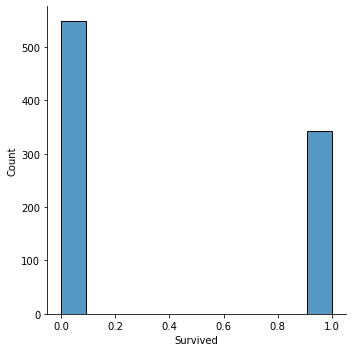

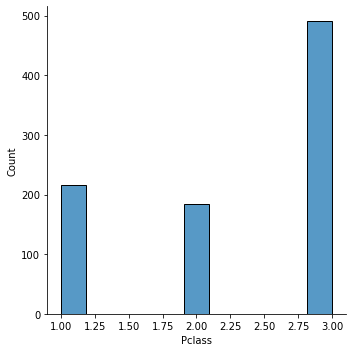

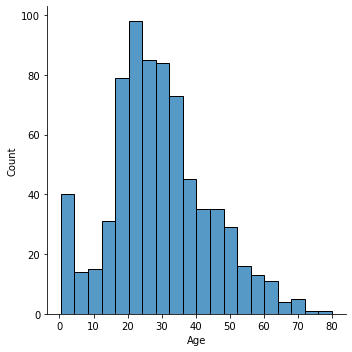

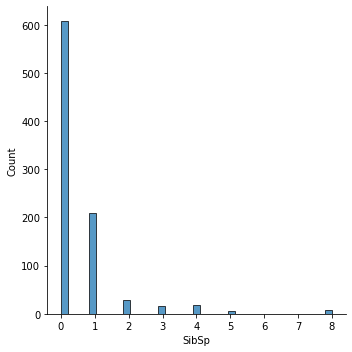

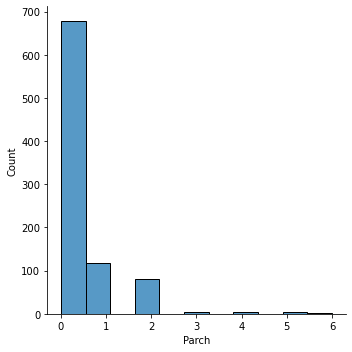

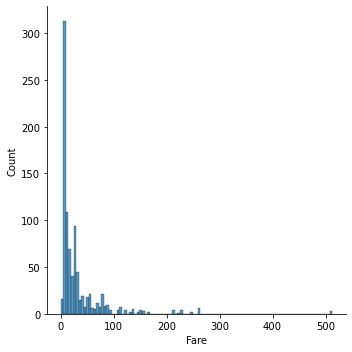

In [9]:
for column in numeric_columns:
    sns.displot(train_ds[column])

In [10]:
# Get information about unique values in numeric columns
train_ds_categorical_only = train_ds.select_dtypes(include=np.object)

for column in train_ds_categorical_only.columns:
    print(f'Column={column}, unique values={train_ds_categorical_only[column].nunique()}')   

Column=Name, unique values=891
Column=Sex, unique values=2
Column=Ticket, unique values=681
Column=Cabin, unique values=147
Column=Embarked, unique values=3


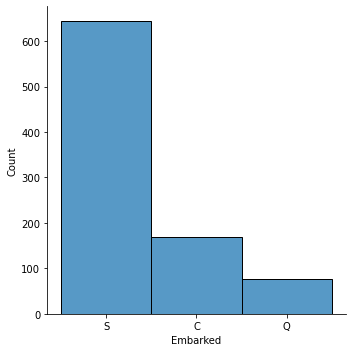

In [11]:
sns.displot(train_ds['Embarked'])

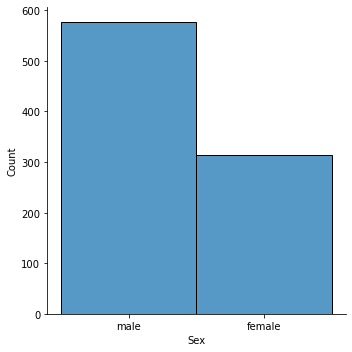

In [12]:
sns.displot(train_ds['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

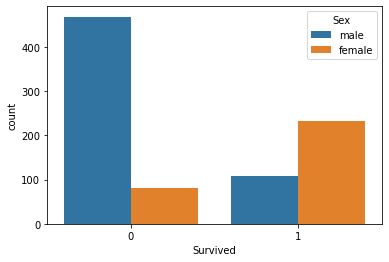

In [13]:
sns.countplot(data=train_ds, x='Survived', hue='Sex') # survived (1) divided by sex 

<AxesSubplot:xlabel='Survived', ylabel='count'>

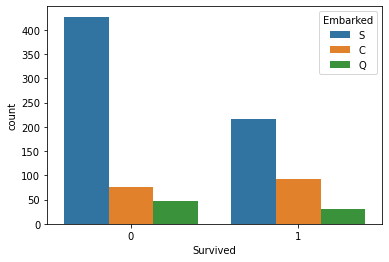

In [90]:
sns.countplot(data=train_ds, x='Survived', hue='Embarked') # survived (1) divided by Embarkment

All functions __pyplot.hist__, __seaborn.countplot__ and __seaborn.displot__ act as wrappers for a matplotlib bar plot and may be used if manually plotting such bar plot is considered too cumbersome.
For continuous variables, __a pyplot.hist__ or __seaborn.distplot__ may be used. 
For discrete variables, a __seaborn.countplot__ is more convenient.

In [42]:
# calculate a total percent of all survived
train_ds['Survived'].value_counts(normalize=True) # -> survived ~38%

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [43]:
# calculate a total percent of men/women 
train_ds['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [66]:
train_ds['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [45]:
train_ds['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [55]:
np.sum(train_ds['Survived'] == 1)

342

In [67]:
# calculate percent of survied divided by men/women
train_ds[['Survived', 'Sex']].groupby('Sex').agg({'Survived':['sum', 'count', 'mean']})

Survived                
            sum count      mean
Sex                            
female      233   314  0.742038
male        109   577  0.188908

In [64]:
# calculate percent of survied divided by class
train_ds[['Survived', 'Pclass']].groupby('Pclass').agg({'Survived':['sum', 'count', 'mean']})

Survived                
            sum count      mean
Pclass                         
1           136   216  0.629630
2            87   184  0.472826
3           119   491  0.242363

In [69]:
# calculate percent of survied divided by Embarked
train_ds[['Survived', 'Embarked']].groupby('Embarked').agg({'Survived':['sum', 'count', 'mean']})

Survived                
              sum count      mean
Embarked                         
C              93   168  0.553571
Q              30    77  0.389610
S             217   644  0.336957

In [101]:
# TODO survived vs age ??? plot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

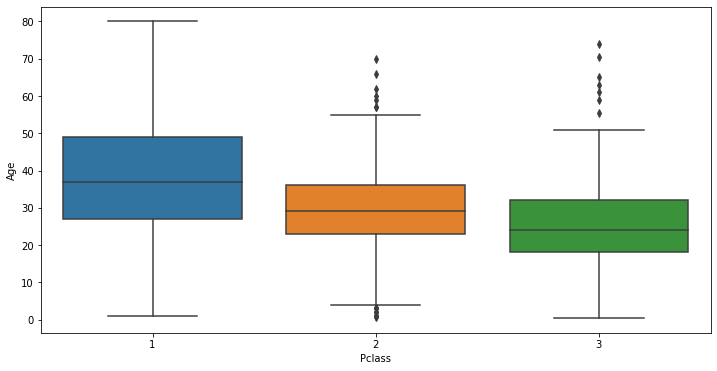

In [102]:
plt.figure(figsize = (12,6))
sns.boxplot(data=train_ds, x='Pclass', y='Age') 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

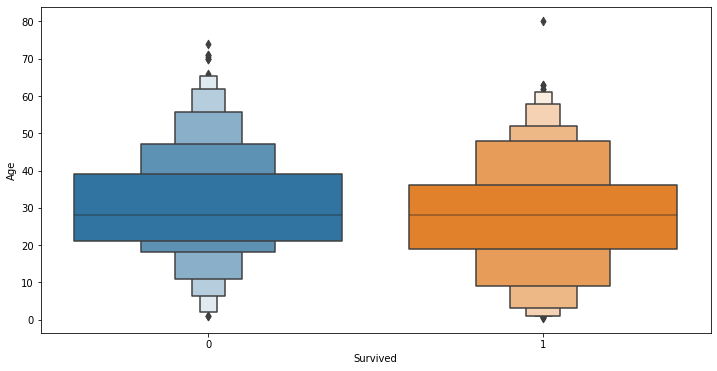

In [105]:
plt.figure(figsize = (12,6))
sns.boxenplot(data=train_ds, x='Survived', y='Age') 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

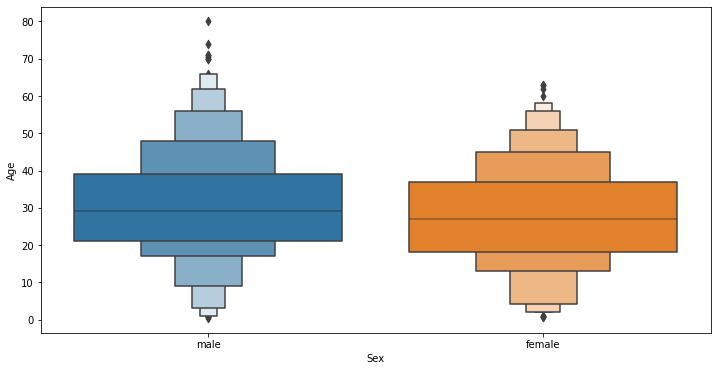

In [106]:
plt.figure(figsize = (12,6))
sns.boxenplot(data=train_ds, x='Sex', y='Age') 

### Step 3 - Get rid of null values

In [93]:
train_ds_prep = train_ds.drop(columns=['PassengerId', 'Name', 'Ticket']) # remove columns which won't be used
train_ds_prep.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [94]:
train_ds_prep.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [95]:
train_ds.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

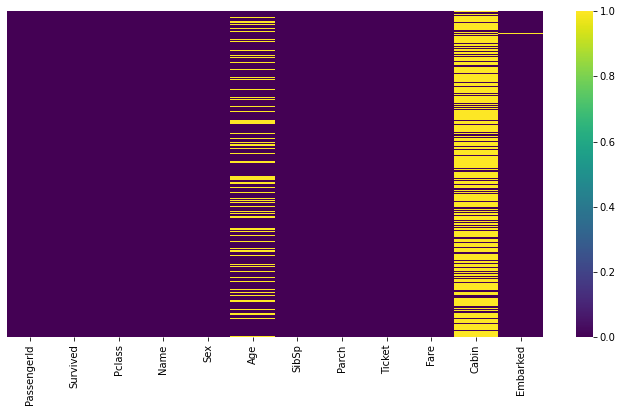

In [96]:
plt.figure(figsize = (12,6))
sns.heatmap(train_ds.isnull(), yticklabels=False, cmap='viridis')

In [97]:
train_ds_prep.drop(columns=['Cabin'], inplace=True)

#### Step 3.1 - Impute (= fill in) missing values using average

In [110]:
# Calculate average age per class
train_ds_prep[['Age', 'Pclass']].groupby('Pclass').agg({'Age':['mean']})


,Age
,mean
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [109]:
class_mean_age_map = {1:38, 2:30, 3:25}

def impute_age(row):
    if pd.isnull(row['Age']):
        return class_mean_age_map[row['Pclass']]
    else:
        return row['Age']


In [113]:
train_ds_prep['Age'] = train_ds_prep.apply(impute_age, axis=1)



In [115]:
train_ds_prep.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [118]:
train_ds_prep.dropna(inplace=True)

In [121]:
train_ds_prep.isna().sum() # To confirm we dropped all NaN

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [131]:
train_ds_prep.shape 

(889, 8)

In [132]:
train_ds_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### Step 4 - Convert catogorical features into numeric values

In [151]:
out = pd.get_dummies(train_ds_prep['Sex']).head() # a separate column for each categorical value & one hot encodings (opt drop_first=True)
out

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [139]:
# the problem with the above solution is that the two columns are fully correlated
out.corr()

,female,male
female,1.0,-1.0
male,-1.0,1.0


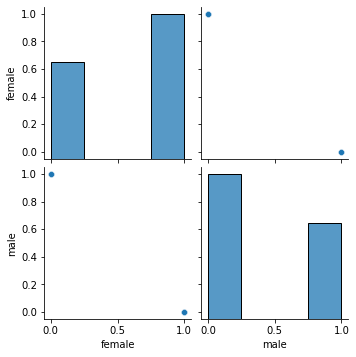

In [138]:
sns.pairplot(out)

In [130]:
pd.get_dummies(train_ds_prep[['Sex', 'Embarked']]).head() # similairly for multiple columns

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [143]:
train_ds_prep['Sex'] = train_ds_prep['Sex'].astype('category') # set column type as category
train_ds_prep['Embarked'] = train_ds_prep['Embarked'].astype('category') # set column type as category

In [145]:
train_ds_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 50.6 KB


In [146]:
train_ds_prep['Sex'].cat

In [147]:
train_ds_prep_cat = train_ds_prep.copy()

In [148]:
train_ds_prep_cat['Sex']=train_ds_prep_cat['Sex'].cat.codes

In [149]:
train_ds_prep_cat['Embarked']=train_ds_prep_cat['Embarked'].cat.codes

In [150]:
train_ds_prep_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Step 5 - Use logistic regression model

In [152]:
X = train_ds_prep_cat.drop('Survived', axis=1)
y = train_ds_prep_cat['Survived']

In [153]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [154]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [161]:
from sklearn.linear_model import LogisticRegression

In [168]:
logistic_model = LogisticRegression( max_iter=200)

In [171]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [172]:
y_pred = logistic_model.predict(X_test)

In [170]:
from sklearn.metrics import classification_report

In [176]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [177]:
# Legend:
# precision = true positive / all predicted positive | true negative / all predicted negative
# recall = true positivee / all actual positive | or negative respectively